## Часть 2. 
### Демонстрация гибридного алгоритма

In [1]:
from src import HybridMetaheuristic


baboon = HybridMetaheuristic("pic/baboon.png", "pic/logo.png")

/home/evgeny/Documents/vkr/src/utilities.py:104: RuntimeWarning: divide by zero encountered in log
  items.append(i * np.log(i))
/home/evgeny/Documents/vkr/src/utilities.py:104: RuntimeWarning: invalid value encountered in scalar multiply
  items.append(i * np.log(i))


In [2]:
# Запускаю алгоритм гибридной метаэвристики
baboon.evolution()

Best Genetic: {'score': 2.3932, 'ssim': 0.9937, 'psnr': 39.29, 'nc': 0.8831, 'th': 10.0}
Best Firefly: {'value': 15.287088905464614, 'score': 2.4143748203921858, 'attract': 1.0}
Best Firefly: {'value': 10.30253214592106, 'score': 2.4128528758916614, 'attract': 0.7800025727620042}
Best Firefly: {'value': 11.599121808942401, 'score': 2.4111591571824214, 'attract': 0.11912871814260523}
Best Firefly: {'value': 10.0, 'score': 2.4124899179537183, 'attract': 0.9747522862993522}
Best Firefly: {'value': 10.240374169604639, 'score': 2.4118466396326124, 'attract': 0.06106065028025577}
Best Firefly: {'value': 10.0, 'score': 2.411890376454724, 'attract': 0.9994223694786497}
Best Firefly: {'value': 9.635718101130667, 'score': 2.4105702521956136, 'attract': 0.9968193611940285}
Best Firefly: {'value': 8.954835019908973, 'score': 2.410560370014811, 'attract': 0.9922390629950311}
Best Firefly: {'value': 9.161685430588989, 'score': 2.4102388718701047, 'attract': 0.015366566591893012}
Best Firefly: {'valu

Best Firefly: {'value': 8.767851350235365, 'score': 2.4054648093975457, 'attract': 0.39638598229306155}
Best Firefly: {'value': 9.979520224370658, 'score': 2.406684731679272, 'attract': 0.9173150222819387}
Best Firefly: {'value': 8.89804861763566, 'score': 2.4056885349037147, 'attract': 0.031699994487590775}
Best Firefly: {'value': 11.204269517833591, 'score': 2.40813264137996, 'attract': 0.7038750896797984}
Best Firefly: {'value': 10.9873238003997, 'score': 2.4092124470935534, 'attract': 0.18914769152021474}
Best Firefly: {'value': 8.767851350235365, 'score': 2.4064463261497346, 'attract': 0.3339559465717471}
Best Firefly: {'value': 8.89804861763566, 'score': 2.4063823874475236, 'attract': 0.028370672415707947}
Best Firefly: {'value': 8.767851350235365, 'score': 2.40689630542626, 'attract': 0.29423917781041625}
Best Genetic: {'score': 2.3909, 'ssim': 0.9946, 'psnr': 39.71, 'nc': 0.8821, 'th': 8.77}
Best Firefly: {'value': 11.408077999676532, 'score': 2.400750367312539, 'attract': 1.0}

Best Genetic: {'score': 2.3901, 'ssim': 0.994, 'psnr': 39.78, 'nc': 0.8828, 'th': 10.06}
Best Genetic: {'score': 2.3888, 'ssim': 0.9938, 'psnr': 40.1, 'nc': 0.8825, 'th': 10.06}
Best Genetic: {'score': 2.3888, 'ssim': 0.9938, 'psnr': 40.1, 'nc': 0.8825, 'th': 10.06}
Best Genetic: {'score': 2.3873, 'ssim': 0.9938, 'psnr': 40.08, 'nc': 0.8837, 'th': 10.06}
Best Genetic: {'score': 2.3871, 'ssim': 0.994, 'psnr': 40.19, 'nc': 0.8832, 'th': 10.06}
Best Genetic: {'score': 2.3871, 'ssim': 0.994, 'psnr': 40.19, 'nc': 0.8832, 'th': 10.06}
Best Genetic: {'score': 2.3863, 'ssim': 0.994, 'psnr': 40.17, 'nc': 0.8839, 'th': 10.06}
Best Genetic: {'score': 2.3855, 'ssim': 0.9939, 'psnr': 40.15, 'nc': 0.8848, 'th': 10.06}
Best Genetic: {'score': 2.3855, 'ssim': 0.9939, 'psnr': 40.15, 'nc': 0.8848, 'th': 10.06}
Best Genetic: {'score': 2.3855, 'ssim': 0.9939, 'psnr': 40.15, 'nc': 0.8848, 'th': 10.06}
Best Genetic: {'score': 2.3855, 'ssim': 0.9939, 'psnr': 40.15, 'nc': 0.8848, 'th': 10.06}
Best Genetic: {'

In [3]:
# Лучший параметр Светлячка
baboon.best_firefly['value']

10.058645512885931

In [4]:
from src import Watermark

# Пробую погрузить ЦВЗ с полученными параметрами
watermark = Watermark(
    baboon.best_candidate_indexes, 
    baboon.embedded_image_bin, 
    baboon.image_matrix, 
    baboon.best_firefly['value']
)

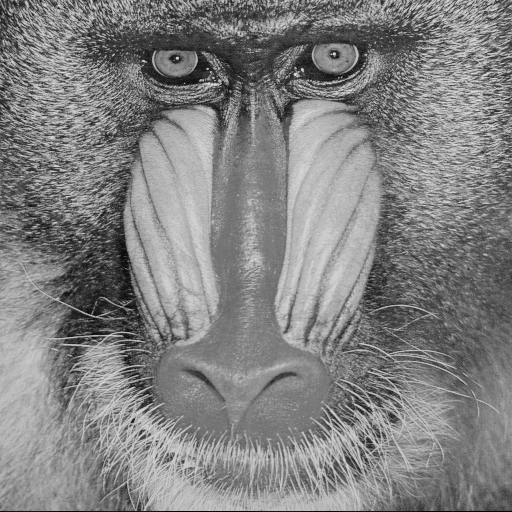

In [5]:
# Исходное изображение без ЦВЗ
baboon.image

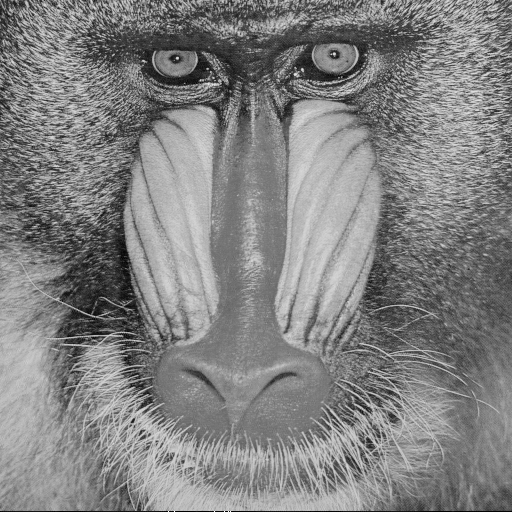

In [6]:
# Полученное изображение с ЦВЗ
watermark.watermark

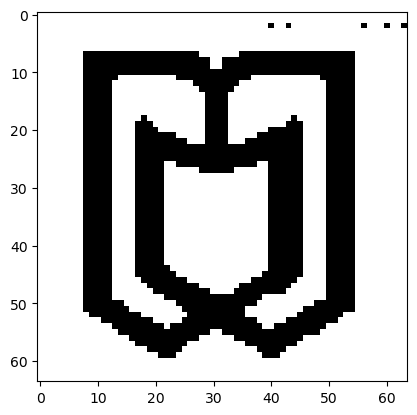

In [7]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [8]:
from src import Attack, Utilities

attacked = Attack(watermark.watermark)

In [9]:
# медианный фильтр

mf = Utilities.extracting(Utilities.matrix_to_image(attacked.mf), watermark.secret_key)
Utilities.get_normal_correlation(mf, watermark.embedded_image_bin)

0.6501731815932706

In [10]:
# фильтр Гаусса

gs3 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs3), watermark.secret_key)
Utilities.get_normal_correlation(gs3, watermark.embedded_image_bin)

1.0

In [11]:
# фильтр Гаусса, kernel=5

gs5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs5), watermark.secret_key)
Utilities.get_normal_correlation(gs5, watermark.embedded_image_bin)

1.0

In [12]:
# усредненная фильтрация, kernel=3

avr = Utilities.extracting(Utilities.matrix_to_image(attacked.avr), watermark.secret_key)
Utilities.get_normal_correlation(avr, watermark.embedded_image_bin)

0.6131687242798354

In [13]:
# Фильтр увеличивает контраст соседних пикселей

shr = Utilities.extracting(Utilities.matrix_to_image(attacked.shr), watermark.secret_key)
Utilities.get_normal_correlation(shr, watermark.embedded_image_bin)

1.0

In [14]:
# Изменение контрастности изображения с использованием гистограмм

his = Utilities.extracting(Utilities.matrix_to_image(attacked.his), watermark.secret_key)
Utilities.get_normal_correlation(his, watermark.embedded_image_bin)

0.9903703703703703

In [15]:
# Искажения яркости пикселей с параметром gamma=0.2

gc2 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc2), watermark.secret_key)
Utilities.get_normal_correlation(gc2, watermark.embedded_image_bin)

0.9417004048582996

In [16]:
# Искажения яркости пикселей с параметром gamma=0.4

gc4 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc4), watermark.secret_key)
Utilities.get_normal_correlation(gc4, watermark.embedded_image_bin)

0.9860113421550094

In [17]:
# Гауссовый шум с параметром 0,001

gn1 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn1), watermark.secret_key)
Utilities.get_normal_correlation(gn1, watermark.embedded_image_bin)

1.0

In [18]:
# Гауссовый шум с параметром 0,005

gn5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn5), watermark.secret_key)
Utilities.get_normal_correlation(gn5, watermark.embedded_image_bin)

1.0

In [19]:
# Гауссовый шум с параметром 0,009

gn9 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn9), watermark.secret_key)
Utilities.get_normal_correlation(gn9, watermark.embedded_image_bin)

0.9967332123411978

In [20]:
# Атака соль/перец с параметром p=0.01

sp1 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp1), watermark.secret_key)
Utilities.get_normal_correlation(sp1, watermark.embedded_image_bin)

0.8994814519345832

In [21]:
# Атака соль/перец с параметром p=0.02

sp2 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp2), watermark.secret_key)
Utilities.get_normal_correlation(sp2, watermark.embedded_image_bin)

0.8470149253731343

In [22]:
# Атака соль/перец с параметром p=0.03

sp3 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp3), watermark.secret_key)
Utilities.get_normal_correlation(sp3, watermark.embedded_image_bin)

0.8276909722222222

In [23]:
# В заданной области затемняет 1/4 пикселей, с параметром center

crp_ct = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_ct), watermark.secret_key)
Utilities.get_normal_correlation(crp_ct, watermark.embedded_image_bin)

0.885403329065301

In [24]:
# В заданной области затемняет 1/4 пикселей, с параметром top-left

crp_tl = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_tl), watermark.secret_key)
Utilities.get_normal_correlation(crp_tl, watermark.embedded_image_bin)

0.9482344874871443

In [25]:
# В заданной области затемняет 1/4 пикселей, с параметром bottom-right

crp_br = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_br), watermark.secret_key)
Utilities.get_normal_correlation(crp_br, watermark.embedded_image_bin)

0.8283917340521114

In [26]:
# Растягивает изображения и возвращает к изначальным размерам 

scl_1024 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_1024), watermark.secret_key)
Utilities.get_normal_correlation(scl_1024, watermark.embedded_image_bin)

0.9562185199535064

In [27]:
# Сжимает изображения и возвращает к изначальным размерам 

scl_256 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_256), watermark.secret_key)
Utilities.get_normal_correlation(scl_256, watermark.embedded_image_bin)

0.7009756097560975

In [28]:
# Вращает изображение против часовой стрелки на заданный угол, 5 градусов

rt5 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt5), watermark.secret_key)
Utilities.get_normal_correlation(rt5, watermark.embedded_image_bin)

0.6884154460719041

In [29]:
# Вращает изображение против часовой стрелки на заданный угол, 45 градусов

rt45 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt45), watermark.secret_key)
Utilities.get_normal_correlation(rt45, watermark.embedded_image_bin)

0.6876750700280112

In [30]:
# Вращает изображение против часовой стрелки на заданный угол, 90 градусов

rt90 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt90), watermark.secret_key)
Utilities.get_normal_correlation(rt90, watermark.embedded_image_bin)

0.6565260058881256

In [31]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 70

com70 = Utilities.extracting(Utilities.matrix_to_image(attacked.com70), watermark.secret_key)
Utilities.get_normal_correlation(com70, watermark.embedded_image_bin)

1.0

In [32]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 80

com80 = Utilities.extracting(Utilities.matrix_to_image(attacked.com80), watermark.secret_key)
Utilities.get_normal_correlation(com80, watermark.embedded_image_bin)

1.0

In [33]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 90

com90 = Utilities.extracting(Utilities.matrix_to_image(attacked.com90), watermark.secret_key)
Utilities.get_normal_correlation(com90, watermark.embedded_image_bin)

1.0